Affiche de l'image sous forme matricielle
(168, 300, 3)
[0 0 0]
151200


Convertion des triplets RGB en miveau de gris de l'image
(168, 300)
0
50400
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


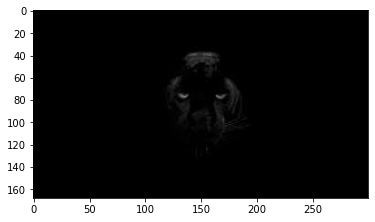

In [1]:
import cv2 # Importation de la bibliothèque opencv
import matplotlib.pyplot as plt

# Détermination du chemin pour lire un fichier image
path = r"/home/ismael/Bureau/M1 IFI SIM/Traitement d'image/image8.jpeg"

# Lecture et création d'un objet image
im = cv2.imread(path)
print("Affiche de l'image sous forme matricielle")
print(im.shape)              # affiche les dimensions de la matrice
print(im[0,0])               # accède à la valeur du premier pixel
print(im.size)
print()
print()
print("Convertion des triplets RGB en miveau de gris de l'image")
matG = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY) # conversion des triplets BVR en gris
print(matG.shape)
print(matG[0,0])
print(matG.size)
print(matG)
plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
plt.show()

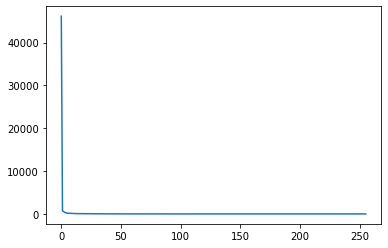

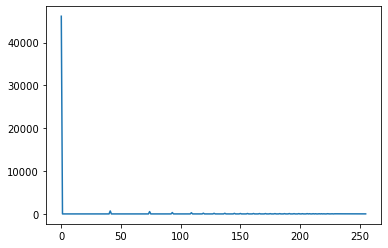

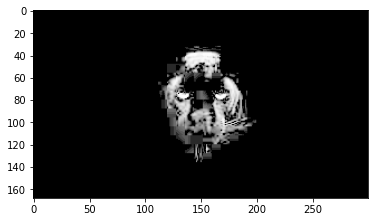

In [2]:
#Augmenter le contraste d'une image : Egalisation de l'histogramme

#Calcule de l'histogramme
hist = cv2.calcHist([im], [0], None, [256], [0, 256])
plt.plot(hist)
plt.show()
newImg = cv2.equalizeHist(matG) 
hist1 = cv2.calcHist([newImg], [0], None, [256], [0, 256])
plt.plot(hist1)
plt.show()
plt.imshow(cv2.cvtColor(newImg, cv2.COLOR_BGR2RGB))
plt.show()

In [3]:
import numpy as np
def adjust_gamma(image, gamma=1.0):
	# build a lookup table mapping the pixel values [0, 255] to
	# their adjusted gamma values
	invGamma = 1.0 / gamma
	table = np.array([((i / 255.0) ** invGamma) * 255
		for i in np.arange(0, 256)]).astype("uint8")
	# apply gamma correction using the lookup table
	return cv2.LUT(image, table)

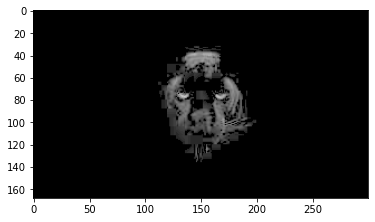

In [4]:
image = adjust_gamma(im, 3)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

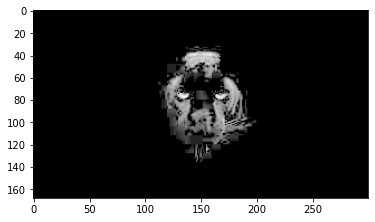

In [5]:
import numpy as np 
  
  
c = 255/(np.log(1 + np.max(im))) 
log_transformed = c * np.log(1 + im) 
  
log_transformed = np.array(log_transformed, dtype = np.uint8) 
  
cv2.imwrite('log_transformed.jpg', log_transformed)
plt.imshow(cv2.cvtColor(log_transformed, cv2.COLOR_BGR2RGB))
plt.show()

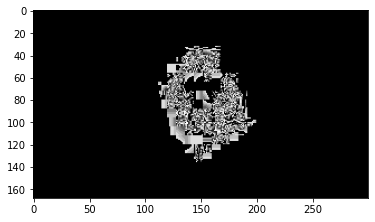

In [6]:
(nbLigne, nbColonne, nbZ) = im.shape # Récupère le nombre de ligne
for i in range(255):                 # 
    c = 255*(i-np.min(im))/((np.max(im))-np.min(im))

for i in range(nbLigne):
    for j in range(nbColonne):
        im[i][j] = c * im[i][j]

plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
plt.show()